# A single neuron

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

In [5]:
w, b = model.weights

In [6]:
w

<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.81497073],
       [-1.0428303 ],
       [ 0.88265073]], dtype=float32)>

In [7]:
b

<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [9]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

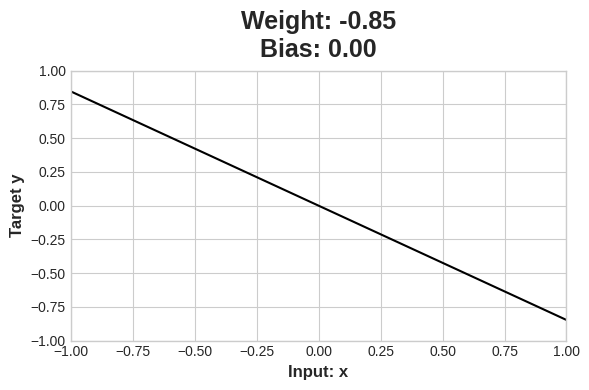

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

# Deep Neural Networks

In [13]:
model = keras.Sequential([
    # hidden (first has inputs)
    layers.Dense(units=4, activation="relu", input_shape=[2]),
    layers.Dense(units=3, activation="relu"),
    # output
    layers.Dense(units=1)
])

# SGD

In [14]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('winequality-red.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=[11]),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1)
])

In [16]:
model.compile(optimizer="adam", loss="mae")

In [17]:
hitory = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=256, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 97ms/step - loss: 0.2717 - val_loss: 0.1405
Epoch 2/10
5/5 [==============================] - 0s 45ms/step - loss: 0.1437 - val_loss: 0.1244
Epoch 3/10
5/5 [==============================] - 0s 56ms/step - loss: 0.1211 - val_loss: 0.1135
Epoch 4/10
5/5 [==============================] - 0s 50ms/step - loss: 0.1124 - val_loss: 0.1055
Epoch 5/10
5/5 [==============================] - 0s 60ms/step - loss: 0.1080 - val_loss: 0.1034
Epoch 6/10
5/5 [==============================] - 0s 69ms/step - loss: 0.1065 - val_loss: 0.1062
Epoch 7/10
5/5 [==============================] - 0s 80ms/step - loss: 0.1035 - val_loss: 0.1014
Epoch 8/10
5/5 [==============================] - 0s 59ms/step - loss: 0.1011 - val_loss: 0.1018
Epoch 9/10
5/5 [==============================] - 0s 53ms/step - loss: 0.1000 - val_loss: 0.0986
Epoch 10/10
5/5 [==============================] - 0s 81ms/step - loss: 0.0995 - val_loss: 0.1001


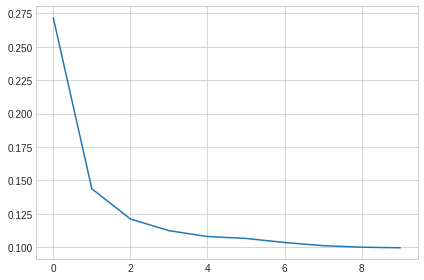

In [19]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(hitory.history)
# use Pandas native plot method
history_df['loss'].plot();

# Overfitting and underfitting

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)

In [21]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=256, epochs=500, callbacks=[early_stopping])

Epoch 1/500
5/5 [==============================] - 0s 82ms/step - loss: 0.0983 - val_loss: 0.0990
Epoch 2/500
5/5 [==============================] - 0s 58ms/step - loss: 0.0962 - val_loss: 0.0988
Epoch 3/500
5/5 [==============================] - 0s 55ms/step - loss: 0.0960 - val_loss: 0.0990
Epoch 4/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0940 - val_loss: 0.0959
Epoch 5/500
5/5 [==============================] - 0s 53ms/step - loss: 0.0928 - val_loss: 0.0966
Epoch 6/500
5/5 [==============================] - 0s 46ms/step - loss: 0.0943 - val_loss: 0.0992
Epoch 7/500
5/5 [==============================] - 0s 42ms/step - loss: 0.0971 - val_loss: 0.0978
Epoch 8/500
5/5 [==============================] - 0s 52ms/step - loss: 0.0934 - val_loss: 0.0969
Epoch 9/500
5/5 [==============================] - 0s 46ms/step - loss: 0.0937 - val_loss: 0.0970
Epoch 10/500
5/5 [==============================] - 0s 57ms/step - loss: 0.0908 - val_loss: 0.1107
Epoch 11/500
5/5 [=

Minimum validation loss: 0.09134186804294586


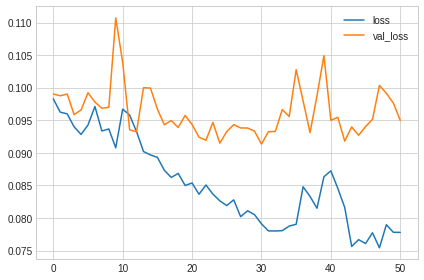

In [22]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Dropout & Batch Normalization

In [23]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
red_wine = pd.read_csv('winequality-red.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']


In [24]:
model = keras.Sequential([
    layers.Dense(1024, activation="relu", input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1)
])

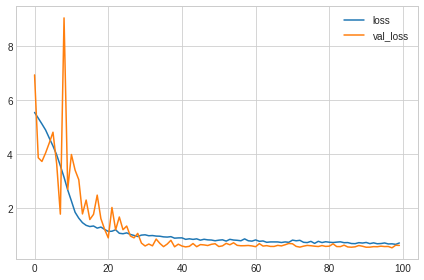

In [25]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

# Binary Classification

In [29]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('ionosphere.csv')
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'g': 0, 'b': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,A,B,C,D,E,F,G,H,I,J,...,Z,AA,AB,AC,AD,AE,AF,AG,AH,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [30]:
model = keras.Sequential([
    layers.Dense(4, activation="relu", input_shape=[33]),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [31]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"])

In [32]:
early_stopping = EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

In [33]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=512, epochs=1000, callbacks=[early_stopping], verbose=0)

Best Validation Loss: 0.4789
Best Validation Accuracy: 0.7524


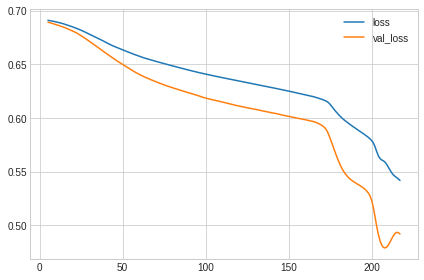

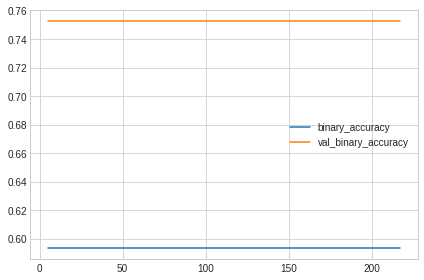

In [34]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))